# BSAN391 - Assignment 1 - Nonlinear Approach

Author: Luis Novoa - Fall 2019

This notebook shows how to implement and solve the Wozac planning problem using a Nonlinear approach using Python/scipy

In [92]:
# Libraries imports
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [93]:
# Parameters
d = 50000       # Current Demand
g = 1.05        # Annual growth in demand
b = 16          # Unit building capacity cost
s = 3           # Unit selling price
p = 0.2         # Unit production cost
c = 0.4         # Unit capacity operating cost
N = 10          # Number of time periods

x0 = 1000       # For initializing the nonlinear optimization method

The profit over $N$ periods, as a function of the capacity to build ${\color{red}x}$, can be written as: 

$$\text{profit}({\color{red}x})=\sum_{t=0}^{N-1}(s-p)\min({\color{red}x},dg^{t})-{\color{red}x}(b+Nc).$$

We define this function in Python as follows:

In [94]:
# Profit Nonlinear Function
def profit(x):
    return -1*(sum((s-p)*min(x,d*(g**t)) for t in range(N)) - x*(b + N*c))

Note that the function above returns the negative of the profit, as the method below minimizes by default:

In [95]:
# Optimization Method                            
optimization = minimize(profit, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})

In [96]:
# Results Display
print ("Maximum Profit (profit(x*)):", "$"+str(-1*profit(optimization.x[0])))
print ("Optimal Capacity to Build (x*):", optimization.x[0])

Maximum Profit (profit(x*)): $419300.0
Optimal Capacity to Build (x*): 55125.0


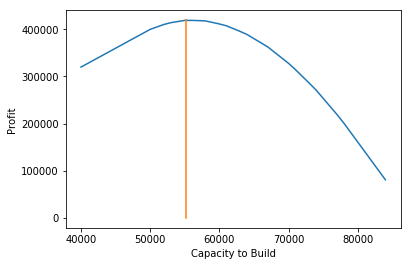

In [97]:
# Plot
r = [i for i in range(40000,85000,1000)]
plt.plot(r, [-profit(j) for j in r], '-')
plt.plot([optimization.x[0],optimization.x[0]],[0,-1*profit(optimization.x[0])])
plt.xlabel('Capacity to Build')
plt.ylabel('Profit')
plt.show()

# EXECUTIVE SUMMARY:

Wozac's maximum possible 10-year profit is $419,300, which it realizes by building a plant
capable of manufacturing 55,125 units of Wozac per year.  

-- This means that the plant will be producing to capacity in each of Years 3 through 10.
A larger plant would allow for greater sales, but the gain in revenues is more than counterbalanced
by the cost of building and maintaining the additional capacity.

-- The optimal plant size is 55,125 units of annual capacity. This was found by maximizing the nonlinear profit function. See the plot above.

-- The model makes a number of assumptions which may be suspect in the real world.  First, it assumes
a constant percentage growth rate in the demand for Wozac over the upcoming ten years.  This is unlikely
to be even approximately true, but cannnot be literally true, since it would result in a demand of a
fractional number of units in some years.  This fractional demand issue does not cause problems with our
optimal solution since demand is a whole number during the first two years, and after that the level of production is limited by capacity, not demand.

-- The model ignores taxes, the inclusion of which would suggest that the firm might wish to depreciate
the factory's construction cost over the ten years.  It assumes a 0% discount rate, so that NPV calculations
were not needed.  It also assumes that the 10-year time horizon is all that is of interest, so that the value
of the factory itself (or further business) is ignored.

-- Since no storage costs were mentioned, we assume that carrying inventory from year to year is impossible.
This assumption may be reasonable if Wozac is perishable, as many drugs are.
